In [1]:
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = 'models/model-190532'
I = pil.open('misc/sample.png', 'r')
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [4]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from models/model-190532


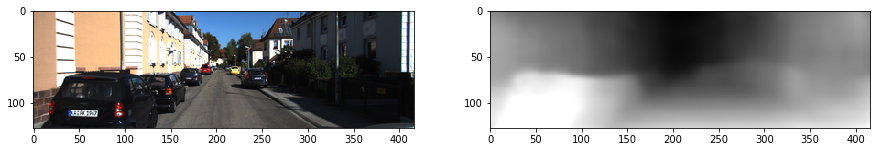

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(1,2,1); plt.imshow(I)
plt.subplot(1,2,2); plt.imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))